**Machine Learning**

Machine learning is a subset of artificial intelligence focused on building systems that can learn from historical data, identify patterns, and make logical decisions with little to no human intervention. It is a data analysis method that automates the building of analytical models through using data that encompasses diverse forms of digital information including numbers, words, clicks and images.

**Machine Learning Needs**

There are a multitude of use cases that machine learning can be applied to in order to cut costs, mitigate risks, and improve overall quality of life including recommending products/services, detecting cybersecurity breaches, and enabling self-driving cars. With greater access to data and computation power, machine learning is becoming more ubiquitous every day and will soon be integrated into many facets of human life.

**Machine Learning methods**

**What is supervised Machine Learning**

Supervised machine learning algorithms use labeled data as training data where the appropriate outputs to input data are known. The machine learning algorithm ingests a set of inputs and corresponding correct outputs. The algorithm compares its own predicted outputs with the correct outputs to calculate model accuracy and then optimizes model parameters to improve accuracy.

Supervised machine learning relies on patterns to predict values on unlabeled data. It is most often used in automation, over large amounts of data records or in cases where there are too many data inputs for humans to process effectively. For example, the algorithm can pick up credit card transactions that are likely to be fraudulent or identify the insurance customer who will most probably file a claim.

In supervised learning, we train the machine using the labeled dataset. It works on supervision where labeled data specifies that inputs are already labeled to the output. First, we train the machine with input data and the corresponding output. Later, we ask to predict the outcome using the test dataset.

Supervised learning algorithms have interesting real-world applications: risk assessment, churn prediction, spam filtering, fraud detection, etc.

Supervised learning algorithms can be further classified into two types.

    Regression

Regression shows the linear relationship between input (x) and output variable (y). The regression algorithms predict continuous output variables, such as weather prediction, house price prediction, market trends, etc.

The mathematical equation for linear regression is; Y = a + bX. Here, X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept.

    Classification

Classification algorithms can solve classification problems where the output variable is categorical, such as churned or non-churned. The classification algorithms forecast the categories present in the data.

**Classification Algorithms**

There are various types of classifiers algorithms. Some of them are :
Linear Classifiers

Linear models create a linear decision boundary between classes. They are simple and computationally efficient. Some of the linear classification models are as follows:

    Logistic Regression
    Support Vector Machines having kernel = ‘linear’
    Single-layer Perceptron


In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

In [30]:
#%% import dataset
data = pd.read_csv("data.csv")
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data))


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (30, 483)
x test:  (30, 86)
y train:  (483,)
y test:  (86,)


In [32]:
# %%initialize
# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [33]:
#%% sigmoid
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(5)

In [34]:
#%% forward and backward
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [35]:
#%%# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [36]:
#%%  # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 0.692860
Cost after iteration 10: 0.638692
Cost after iteration 20: 0.613871
Cost after iteration 30: 0.591776
Cost after iteration 40: 0.572024
Cost after iteration 50: 0.554314
Cost after iteration 60: 0.538375
Cost after iteration 70: 0.523968
Cost after iteration 80: 0.510891
Cost after iteration 90: 0.498971


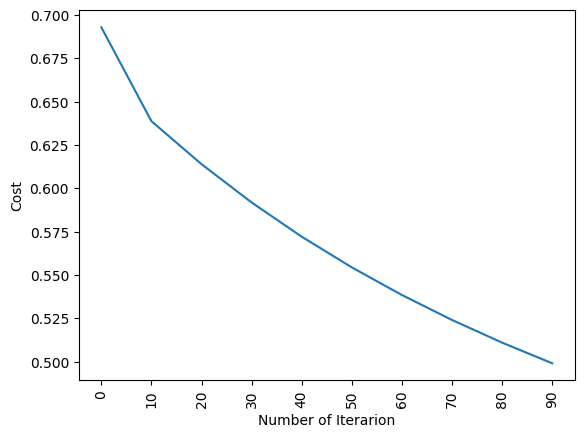

train accuracy: 80.74534161490683 %
test accuracy: 81.3953488372093 %


In [37]:
# %%
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 100)

In [38]:
# sklearn
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))


test accuracy: 0.8953488372093024 
train accuracy: 0.8633540372670807 
